In [83]:
import pandas as pd
import numpy as np
import itertools
from itertools import combinations
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [84]:
# import elo data as df
data_elo = pd.read_excel("./data/data_elo.xlsx")
data_elo
# indices = data_elo[data_elo["Land"] == "Türkei"].index

# print("Indices where 'Türkei' appears in the 'Land' column:", indices)
# row_219 = data_elo.iloc[219]
# row_219


,Land,R,Average #,Average R,1 Year Change #,1 Year Change R,Matches T,Matches H,Matches A,Matches N,Matches W,Matches L,Matches D,Goals F,Goals A
0,Afghanistan,1114,167,904,7,20,150,9,57,84,36,79,35,146,312
1,Albanien,1613,73,1499,15,74,383,181,176,26,105,197,81,363,577
2,Algerien,1666,51,1632,-5,-46,650,245,226,179,290,187,173,982,668
3,Andorra,1113,182,1047,3,-8,208,85,93,30,13,167,28,70,505
4,Angola,1508,88,1457,24,101,427,147,173,107,152,128,147,495,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Westsahara,996,189,996,-3,0,1,0,1,0,0,1,0,0,6
237,Jemen,1094,144,1212,5,2,274,53,81,140,59,165,50,265,561
238,Sambia,1485,60,1559,-6,-1,826,262,342,222,376,237,213,1319,869
239,Sansibar,1326,145,1108,-5,-2,204,27,42,135,37,126,41,169,434


In [85]:
# import market value data as df
data_market_value = pd.read_excel("./data/data_makret_value.xlsx")
data_market_value


# indices = data_market_value[data_market_value["Land"] == "Türkei"].index
# indices

# print("Indices where 'Türkei' appears in the 'Land' column:", indices)
# row_219 = data_elo.iloc[219]
# row_219

,#,Land,Confederation,Market Value
0,1,England,UEFA,€1.47bn
1,2,Frankreich,UEFA,€1.21bn
2,3,Portugal,UEFA,€1.06bn
3,4,Spanien,UEFA,€906.00m
4,5,Italien,UEFA,€757.00m
5,6,Deutschland,UEFA,€672.00m
6,7,Niederlande,UEFA,€610.00m
7,8,Belgien,UEFA,€540.80m
8,9,Norwegen,UEFA,€474.20m
9,10,Dänemark,UEFA,€368.50m


In [86]:
# import team list from the european chamipionship 2024

data_teams = pd.read_excel("./data/em_teams.xlsx")
data_teams


,Land,Gruppe
0,Deutschland,A
1,Schottland,A
2,Ungarn,A
3,Schweiz,A
4,Spanien,B
5,Kroatien,B
6,Italien,B
7,Albanien,B
8,Slowenien,C
9,Dänemark,C


In [87]:
merge_data = pd.merge(data_teams, data_elo, on="Land")
merge_data = pd.merge(merge_data,data_market_value,on="Land" )
merge_data

,Land,Gruppe,R,Average #,Average R,1 Year Change #,1 Year Change R,Matches T,Matches H,Matches A,Matches N,Matches W,Matches L,Matches D,Goals F,Goals A,#,Confederation,Market Value
0,Deutschland,A,1921,8,1910,-3,-30,1019,451,407,161,587,220,212,2286,1207,6,UEFA,€672.00m
1,Schottland,A,1776,14,1878,0,-22,843,392,404,47,401,258,184,1456,1041,16,UEFA,€239.40m
2,Ungarn,A,1842,20,1836,3,11,1013,456,485,72,482,315,216,2061,1492,23,UEFA,€166.65m
3,Schweiz,A,1804,27,1686,-7,-87,869,414,382,73,308,368,193,1286,1453,18,UEFA,€223.20m
4,Spanien,B,2019,7,1942,4,56,753,329,294,130,440,138,175,1517,675,4,UEFA,€906.00m
5,Kroatien,B,1953,12,1879,-3,-4,375,147,159,69,196,78,101,647,376,14,UEFA,€286.00m
6,Italien,B,1956,8,1916,0,6,878,396,317,165,467,171,240,1536,863,5,UEFA,€757.00m
7,Albanien,B,1613,73,1499,15,74,383,181,176,26,105,197,81,363,577,30,UEFA,€123.05m
8,Slowenien,C,1739,55,1619,12,61,292,132,134,26,108,111,73,370,344,27,UEFA,€130.85m
9,Dänemark,C,1822,20,1798,-2,-32,879,400,388,91,409,292,178,1612,1190,10,UEFA,€368.50m


In [88]:
def win_possiblility(data, country_a, country_b):
    rating_a = data.loc[data["Land"] == country_a, "R"].values[0]
    rating_b = data.loc[data["Land"] == country_b, "R"].values[0]

    dr = rating_a - rating_b
    we = 1 / (10 ** (-dr / 400) + 1)

    return we

# test = win_possiblility(merge_data, "Schweiz", "Deutschland")
test = win_possiblility(merge_data, "Deutschland", "Türkei")
test



0.7279715135441962

In [156]:
#Um ein unetschieden zu berechnen benötigen wir einen Wert für die wahrscheinlichkeit, dass ein Unentschieden eintritt.
draw_possibility = sum(merge_data["Matches D"])/sum(merge_data["Matches T"])
print(draw_possibility)

#Anzahl der Tore die in einem Spiel fallen können mithilfe der Poisson-Verteilung berechnen
def poisson_pred(data, country):
    country_data = data.loc[data["Land"] == country]
    poisson_pred = country_data["Goals F"].sum() / country_data["Matches T"].sum()

    return poisson_pred


def poisson_pred_diff(data, country):
    country_data = data.loc[data["Land"] == country]
    poisson_pred_diff = (country_data["Goals F"].sum() - country_data["Goals A"].sum()) / country_data["Matches T"].sum()

    return (poisson_pred_diff)

print(poisson_pred_diff(merge_data, "Schweiz"))

0.2263644667732359
0.19217491369390102


In [159]:
def simulate_game_ko(data, team_a = str, team_b = str):

    win_pos_a = win_possiblility(data, team_a, team_b)
    if np.random.random() <= win_pos_a:
        win_team = team_a
    else:
        win_team = team_b

    return win_team

#Spiele mit unentschieden simulieren
def simulate_game_group(data, team_a = str, team_b = str):
    rating_a = data.loc[data["Land"] == team_a, "R"].values[0]
    rating_b = data.loc[data["Land"] == team_b, "R"].values[0]
    draw_pos = draw_possibility + 0.06 * (((rating_a - rating_b)/200)**2)  #Annäherung an ein unentschieden mit berücksichtigung der ELO Differenz
    win_pos_a = win_possiblility(data, team_a, team_b) - (draw_pos/2)
    random_number = np.random.random()

    punkte_a = 0
    punkte_b = 0

    if random_number <= draw_pos:
        punkte_a = 1
        punkte_b = 1
        tore_a = np.random.poisson(poisson_pred(data, team_a))
        tore_b = tore_a

    elif random_number <= draw_pos + win_pos_a:
        punkte_a = 3

        tore_a = np.random.poisson(poisson_pred(data, team_a))
        if tore_a == 0:
            tore_a = 1

        tore_b = np.random.poisson(poisson_pred(data, team_b))
        if tore_b == tore_a:
            tore_b = tore_a - abs(np.random.poisson(poisson_pred_diff(data, team_b)))
            
    else:
        punkte_b = 3
        tore_b = np.random.poisson(poisson_pred(data, team_b))
        if tore_b == 0:
            tore_b = np.random.poisson(poisson_pred(data, team_b))
        tore_a = np.random.poisson(poisson_pred(data, team_a))
        if tore_a == tore_b:
            tore_a = tore_b - abs(np.random.poisson(poisson_pred_diff(data, team_a)))
        

    return punkte_a, punkte_b, tore_a, tore_b


test = simulate_game_group(merge_data, "Schweiz", "Deutschland")
test

(0, 3, 1, 1)

In [91]:
def simulate_group(data, group):
    # DataFrame für die spezifische Gruppe filtern
    filtered_df = data_teams[data_teams['Gruppe'] == group].copy()

    # Neue Spalten für Punkte und Tordifferenz hinzufügen und auf Null initialisieren
    filtered_df.loc[:, 'points'] = 0
    filtered_df.loc[:, 'goals_diff'] = 0
    filtered_df.loc[:, 'goals_for'] = 0
    filtered_df.loc[:, 'goals_against'] = 0

    # Iteriere über alle Kombinationen von Ländern innerhalb der Gruppe und simuliere jedes Spiel
    for country_a, country_b in combinations(filtered_df['Land'], 2):
        punkte_a, punkte_b, tore_a, tore_b = simulate_game_group(data, country_a, country_b)
        
        # Punkte und Tordifferenz für jedes Land aktualisieren
        filtered_df.loc[filtered_df['Land'] == country_a, 'points'] += punkte_a
        filtered_df.loc[filtered_df['Land'] == country_b, 'points'] += punkte_b
        filtered_df.loc[filtered_df['Land'] == country_a, 'goals_diff'] += tore_a - tore_b
        filtered_df.loc[filtered_df['Land'] == country_b, 'goals_diff'] += tore_b - tore_a
        filtered_df.loc[filtered_df['Land'] == country_a, 'goals_for'] += tore_a
        filtered_df.loc[filtered_df['Land'] == country_a, 'goals_against'] += tore_b
        filtered_df.loc[filtered_df['Land'] == country_b, 'goals_for'] += tore_b
        filtered_df.loc[filtered_df['Land'] == country_b, 'goals_against'] += tore_a

    # Sortiere die Länder nach Punkten und Tordifferenz
    filtered_df = filtered_df.sort_values(by=['points', 'goals_diff', 'goals_for', 'goals_against'], ascending=False).reset_index(drop=True)

    return filtered_df

test = simulate_group(merge_data, "A")
print(test)

          Land Gruppe  points  goals_diff  goals_for  goals_against
0      Schweiz      A       5           1          4              3
1       Ungarn      A       3           0          7              7
2  Deutschland      A       3           0          6              6
3   Schottland      A       2          -1          4              5


In [92]:
def get_wildcard(groups: list):
    # Erzeuge eine Liste mit den Gruppendritten
    third_place = []
    for group in groups:
        third_place.append(group.iloc[2])
    third_place = sorted(third_place, key=lambda x: (x['points'], x['goals_diff'], x['goals_for'], x['goals_against']), reverse=True)
    
    third_place = [team['Land'] for team in third_place]
    return third_place

In [93]:
def octa_round(data):
    #Get every group
    group_a = simulate_group(data, "A")
    group_b = simulate_group(data, "B")
    group_c = simulate_group(data, "C")
    group_d = simulate_group(data, "D")
    group_e = simulate_group(data, "E")
    group_f = simulate_group(data, "F")
    
    #Get 4 extra teams (3rd place)
    wildcard1 = get_wildcard([group_a, group_d, group_e, group_f])[0]
    wildcard2 = get_wildcard([group_a, group_b, group_c])[0]
    if wildcard1 == wildcard2:
        wildcard2 = get_wildcard([group_a, group_b, group_c])[1]


    wildcard3 = get_wildcard([group_a, group_b, group_c, group_d])[0]
    if wildcard3 == wildcard1 or wildcard3 == wildcard2:
        wildcard3 = get_wildcard([group_a, group_b, group_c, group_d])[1]
        if wildcard3 == wildcard1 or wildcard3 == wildcard2:
            wildcard3 = get_wildcard([group_a, group_b, group_c, group_d])[2]
    
    wildcard4 = get_wildcard([group_d, group_e, group_f])[0]
    if wildcard4 == wildcard1 or wildcard4 == wildcard2 or wildcard4 == wildcard3:
        wildcard4 = get_wildcard([group_d, group_e, group_f])[1]
        if wildcard4 == wildcard1 or wildcard4 == wildcard2 or wildcard4 == wildcard3:
            wildcard4 = get_wildcard([group_d, group_e, group_f])[2]

    group_a = group_a['Land'].tolist()
    group_b = group_b['Land'].tolist()
    group_c = group_c['Land'].tolist()
    group_d = group_d['Land'].tolist()
    group_e = group_e['Land'].tolist()
    group_f = group_f['Land'].tolist()


    octa_final_1 = simulate_game_ko(data, group_b[0], wildcard1)
    octa_final_2 = simulate_game_ko(data, group_a[0], group_c[1])
    octa_final_3 = simulate_game_ko(data, group_f[0], wildcard2)
    octa_final_4 = simulate_game_ko(data, group_d[1], group_e[1])
    octa_final_5 = simulate_game_ko(data, group_e[0], wildcard3)
    octa_final_6 = simulate_game_ko(data, group_d[0], group_f[1])
    octa_final_7 = simulate_game_ko(data, group_c[0], wildcard4)
    octa_final_8 = simulate_game_ko(data, group_a[1], group_b[1])


    octa_finals = [octa_final_1, octa_final_2, octa_final_3, octa_final_4, octa_final_5, octa_final_6, octa_final_7, octa_final_8]

    return octa_finals



test = octa_round(merge_data)
print(test)

['Spanien', 'Serbien', 'Portugal', 'Belgien', 'Ukraine', 'Türkei', 'England', 'Italien']


In [94]:
def quater_round(data, octa_finals):
    quater_final_1 = simulate_game_ko(data, octa_finals[0], octa_finals[1])
    quater_final_2 = simulate_game_ko(data, octa_finals[2], octa_finals[3])
    quater_final_3 = simulate_game_ko(data, octa_finals[4], octa_finals[5])
    quater_final_4 = simulate_game_ko(data, octa_finals[6], octa_finals[7])

    quater_finals = [quater_final_1, quater_final_2, quater_final_3, quater_final_4]

    return quater_finals

test_quater = quater_round(merge_data, test)
print(test_quater)

['Spanien', 'Belgien', 'Ukraine', 'England']


In [95]:
def half_round(data, quater_finals):
    half_final_1 = simulate_game_ko(data, quater_finals[0], quater_finals[1])
    half_final_2 = simulate_game_ko(data, quater_finals[2], quater_finals[3])

    half_finals = [half_final_1, half_final_2]

    return half_finals

test_half = half_round(merge_data, test_quater)
print(test_half)

['Belgien', 'England']


In [96]:
def final_round(data, half_finals):
    final = simulate_game_ko(data, half_finals[0], half_finals[1])

    return final

test_final = final_round(merge_data, test_half)
print(test_final)

England


In [97]:
def simulate_tournament(data):
    octa_finals = octa_round(data)
    quater_finals = quater_round(data, octa_finals)
    half_finals = half_round(data, quater_finals)
    final = final_round(data, half_finals)
    print("The winner of the tournament is: ", final)
    return final

test_tournament = simulate_tournament(merge_data)


The winner of the tournament is:  Spanien


In [98]:
def multiple_simulations(data, n):
    winner_dict = {}

    for i in range(n):
        winner = simulate_tournament(data)
        print(i)

        if winner not in winner_dict:
            winner_dict[winner] = 1
        else:
            winner_dict[winner] += 1
    
    return winner_dict

In [161]:
n = 100
lst = multiple_simulations(merge_data, n)
print(lst)

The winner of the tournament is:  England
0
The winner of the tournament is:  Kroatien
1
The winner of the tournament is:  Italien
2
The winner of the tournament is:  Niederlande
3
The winner of the tournament is:  Belgien
4
The winner of the tournament is:  Spanien
5
The winner of the tournament is:  Spanien
6
The winner of the tournament is:  Frankreich
7
The winner of the tournament is:  England
8
The winner of the tournament is:  Frankreich
9
The winner of the tournament is:  England
10
The winner of the tournament is:  Frankreich
11
The winner of the tournament is:  Portugal
12
The winner of the tournament is:  Frankreich
13
The winner of the tournament is:  Belgien
14
The winner of the tournament is:  Portugal
15
The winner of the tournament is:  Portugal
16
The winner of the tournament is:  Frankreich
17
The winner of the tournament is:  Portugal
18
The winner of the tournament is:  Ungarn
19
The winner of the tournament is:  Spanien
20
The winner of the tournament is:  Frankrei

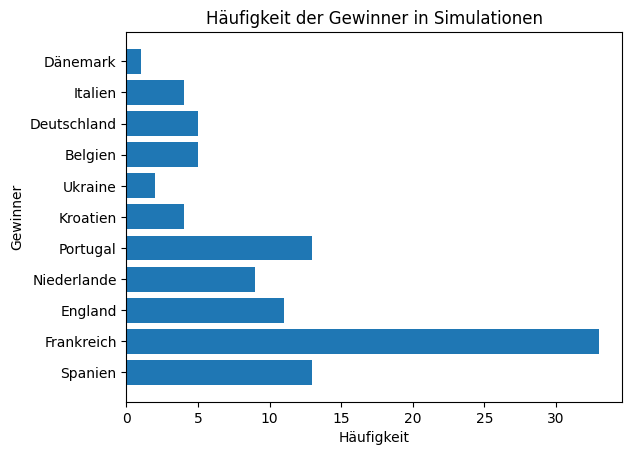

In [100]:
plt.barh(list(lst.keys()), lst.values())  # Horizontaler Balkendiagramm
plt.xlabel('Häufigkeit')
plt.ylabel('Gewinner')
plt.title('Häufigkeit der Gewinner in Simulationen')
plt.show()

In [101]:
print("Chance das die Schweiz die EM gewinnt liegt bei:", lst["Schweiz"]/n, "%")
print("Anzahl der Simulationen:", n)

KeyError: 'Schweiz'

In [ ]:
# def ko_quali_list(group_rangking, groups = ["A", "B", "C", "D", "E", "F"]):
#     winner = []

#     for group in groups:
#         if 


#def ko_simulation():
      
 
    
  
# def ko_winners():

    

# def final_simulation():
    

# def simulation(data, repetitions):


In [ ]:
# TO DO:
# - create all functions
# - make this file a heler file
# - run the simulation in a new file called simulation
# - calc the possibility that Switzerland wins the EC